#### 공부 시간과 과외횟수에 따른 점수 예측하기
- 목표 : 공부시간과 과외횟수가 가지는 패턴/규칙을 찾아서 점수를 예측
- 데이터셋 : 임의로 생성
- 피쳐/속성 : 공부시간, 과외횟수
- 타겟/라벨 : 점수
- 학습방법 : 지도학습 > 회귀
- 알고리즘 : 선형회귀 <= [조건] 데이터의 분포가 선형이어야 함  

[1] 데이터 준비

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# 14개 데이터셋
hour=[1,3,4,5,7,9,10]
jumsu=[32,55,83,79,99,92,100]
lesson=[0,0,2,1,2,0,1]

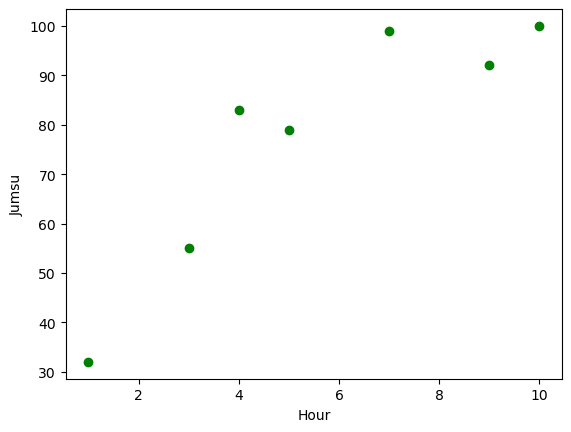

In [6]:
# 현재 데이터의 분포 확인
plt.plot(hour, jumsu, 'go')
plt.xlabel('Hour')
plt.ylabel('Jumsu')
plt.show()

In [7]:
# 학습용 데이터셋 구성
dataDF=pd.DataFrame({'Hour':hour, 'Lesson':lesson})
jumsuSR=pd.Series(jumsu)

[2] 학습 진행 - 다중 선형 회귀

In [9]:
# 모듈 로딩
from sklearn.linear_model import LinearRegression

In [10]:
# 모듈 인스턴스 생성
model=LinearRegression()

# 학습 진행 => 최개한 많은 데이터를 만족하는 직선의 기울기와 절편 찾기
model.fit(dataDF, jumsuSR)

LinearRegression()

In [11]:
# 모델 파라미터 확인 => 피쳐가 2개 => coef_ 2개
print(f'model.coef_ : {len(model.coef_)} 개, {model.coef_}')
print(f'model.intercept_ : {model.intercept_}')

model.coef_ : 2 개, [ 6.17958594 11.95618681]
model.intercept_ : 32.46557534906114


[3] 모델 성능 평가

In [12]:
# 모듈 로딩 => 손상/비용함수로 오차 계산, 결정계수
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [13]:
# 점수 => 내부에서 predict() 진행 => 결과로 R2 계수 추출해서 반환
score=model.score(dataDF, jumsuSR)
print(f'score : {score}')

score : 0.9652201542848703


In [17]:
# 성능지표 => 오차계산과 결정계수 계산
pre_jumsu=model.predict(dataDF)

# 손실/비용 계산 함수 => 정답과 예측값
mse=mean_squared_error(jumsuSR, pre_jumsu)
rmse=mean_squared_error(jumsuSR, pre_jumsu, squared=False)
mae=mean_absolute_error(jumsuSR, pre_jumsu)

# 얼마나 정답에 가깝게 값을 예측 했느냐를 나타내는 지표 => 정답과 예측값 제공 : 1에 가까울 수록 좋음
r2=r2_score(jumsuSR, pre_jumsu)

In [18]:
# 손실/비용함수 값은 0에 가까울 수록
# 결정계수 값은 1에 가까울 수록 성능 좋은 모델
print(f'mse : {mse}')
print(f'rmse : {rmse}')
print(f'mae : {mae}')
print(f'r2 : {r2}')

mse : 18.81518673911548
rmse : 4.337647604302991
mae : 3.8565238324506503
r2 : 0.9652201542848703
